<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [3]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,902.000000,902.000000,902.000000,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,36.832594,797.782705,9.433481,2.952328,1.0,1014.508869,2.688470,67.124169,2.721729,2.021064,...,2.694013,80.0,0.804878,11.043237,2.815965,2.743902,6.794900,4.144124,2.144124,3.936807
std,9.306933,405.292650,8.248331,1.041295,0.0,608.153731,1.103652,20.558087,0.710750,1.093112,...,1.083397,0.0,0.862113,7.810982,1.309680,0.708159,6.089151,3.647824,3.108697,3.480307
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,459.750000,2.000000,2.000000,1.0,477.250000,2.000000,49.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,801.500000,7.000000,3.000000,1.0,1001.500000,3.000000,67.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1156.250000,15.000000,4.000000,1.0,1553.750000,4.000000,85.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df['Attrition'].value_counts()

Attrition
No     713
Yes    189
Name: count, dtype: int64

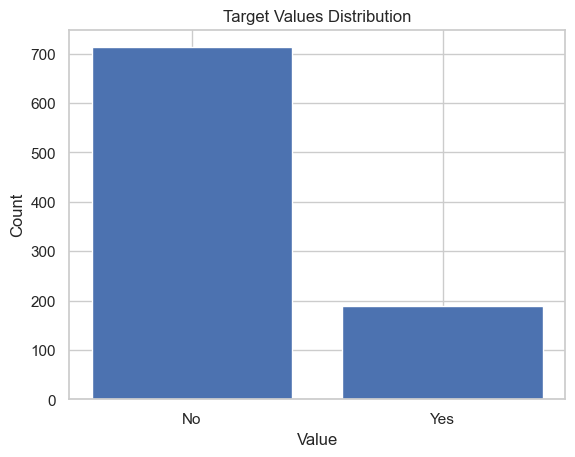

In [8]:
fig, axis = plt.subplots()
axis.bar(['No', 'Yes'], df['Attrition'].value_counts())
axis.set_title("Target Values Distribution")
axis.set_xlabel('Value')
axis.set_ylabel('Count')
plt.show()

It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [9]:
unique_values= {}

print("column       unique values count")
print("-" * 32)
for col in df.columns:
    _ = df[col].nunique()
    unique_values[col] = _
    print(f"{col}{(32 - len(col) - len(str(_))) * ' '}{_}")
print("-" * 32, "\n")

print("-" * 32)
print("Removing unique columns")
for col in unique_values.keys():
    if unique_values[col] < 2 :
        print(f"    removing {col}")
        df.drop([col], axis=1, inplace=True)
print("-" * 32, "\n")

column       unique values count
--------------------------------
Age                           42
Attrition                      2
BusinessTravel                 3
DailyRate                    653
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber               902
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                853
MonthlyRate                  888
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorki

Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

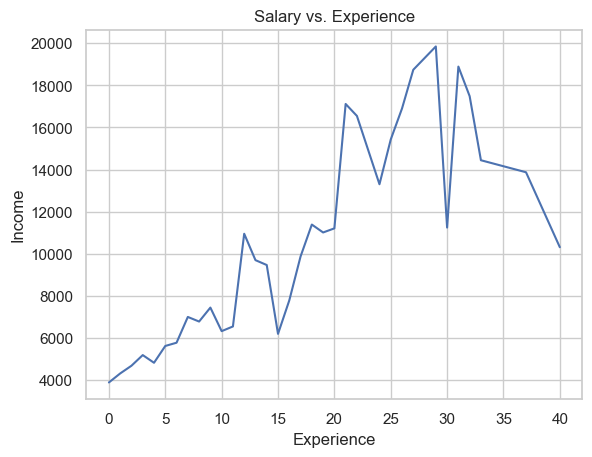

In [10]:
# TODO: Then find which departments have the highest and lowest incomes on average.
avg_income = df.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()
fig, ax = plt.subplots()
sns.lineplot(data=avg_income, x='YearsAtCompany', y='MonthlyIncome')
ax.set_xlabel('Experience')
ax.set_ylabel('Income')
ax.set_title('Salary vs. Experience')
plt.show()

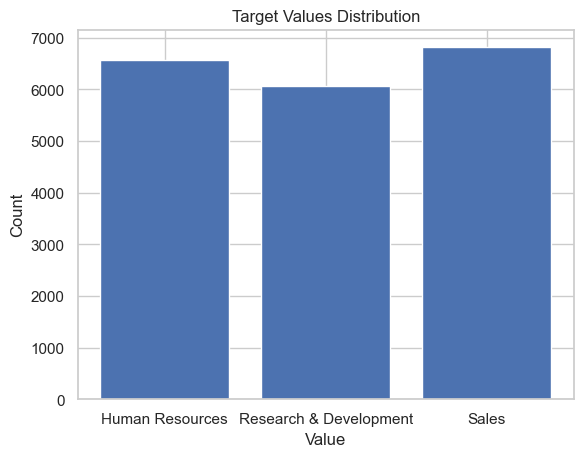

----------------------------------------------------
Research & Development has the lowest income 6073.64
Sales has the highest income 6817.39
----------------------------------------------------


In [11]:
avg_income = df.groupby("Department")['MonthlyIncome'].mean().reset_index()
fig, axis = plt.subplots()

axis.bar(avg_income["Department"] , avg_income['MonthlyIncome'])
axis.set_title("Target Values Distribution")
axis.set_xlabel('Value')
axis.set_ylabel('Count')
plt.show()

print("-" * 52)
print(f"{avg_income['Department'][avg_income['MonthlyIncome'].argmin()]} has the lowest income {avg_income['MonthlyIncome'].min():.2f}")
print(f"{avg_income['Department'][avg_income['MonthlyIncome'].argmax()]} has the highest income {avg_income['MonthlyIncome'].max():.2f}")
print("-" * 52)

# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [12]:
# TODO: Label encode all categorical columns
label_encoder = LabelEncoder()
encoded_df = copy.copy(df)
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(df[col])
    
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,0,1,1234,1,20,5,3,1606,2,...,3,3,1,32,3,3,30,8,12,13


In [13]:
X = encoded_df.drop(columns=['Attrition'])
y = encoded_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [14]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # Store the number of neighbors (k)
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        # Store training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        dist = (x1 - x2) ** 2
        dist = dist.sum()
        dist = np.sqrt(dist)
        return dist
        

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        predictions = [self._predict(x) for x in X_test]
        return predictions

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        dists = [self.euclidean_distance(x, _x) for _x in self.X_train]
        k_nearest_neighbors = np.argsort(dists)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_neighbors]
        most_common_label = Counter(k_nearest_labels).most_common()[0][0]
        return most_common_label
    
    

Fit and test your model using different k values and then choose the best one.

In [15]:
# Optional. You can choose any range of k values that you want.
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

print("-" * 30)

for k in k_values:
    knn = CustomKNN(k)
    knn.fit(X_train, y_train)
    y_pred = np.array(knn.predict(X_test))
    accuracies.append(accuracy_score(y_test, y_pred))
    print(f'k: {k}{" " if k < 10 else ""} - Accuracy: {accuracy_score(y_test, y_pred):.10f}')
    
print("-" * 30)

Best_custom_model = CustomKNN(k=k_values[np.argmax(accuracies)])
Best_custom_model.fit(X_train, y_train)

# Keep the best k value (needed later on with bagging)
bestk= Best_custom_model.k

print(f"Best k is {bestk}")

------------------------------
k: 1  - Accuracy: 0.8081180812
k: 3  - Accuracy: 0.8007380074
k: 5  - Accuracy: 0.8007380074
k: 7  - Accuracy: 0.8265682657
k: 9  - Accuracy: 0.8302583026
k: 11 - Accuracy: 0.8154981550
k: 13 - Accuracy: 0.8265682657
k: 15 - Accuracy: 0.8118081181
------------------------------
Best k is 9


In [16]:
# TODO: Print the accuracy and classification report using sklearn's metrics for your best model
accuracies = []

print("-" * 30)
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'k: {k}{" " if k < 10 else ""} - Accuracy: {accuracy_score(y_test, y_pred):.10f}')
print("-" * 30)

best_sklearn_model = KNeighborsClassifier(n_neighbors=k_values[np.argmax(accuracies)])
best_sklearn_model.fit(X_train, y_train)

------------------------------
k: 1  - Accuracy: 0.8081180812
k: 3  - Accuracy: 0.8007380074
k: 5  - Accuracy: 0.8007380074
k: 7  - Accuracy: 0.8265682657
k: 9  - Accuracy: 0.8302583026
k: 11 - Accuracy: 0.8154981550
k: 13 - Accuracy: 0.8265682657
k: 15 - Accuracy: 0.8118081181
------------------------------


KNeighborsClassifier(n_neighbors=9)

Visualize the confusion matrix for KNN predictions

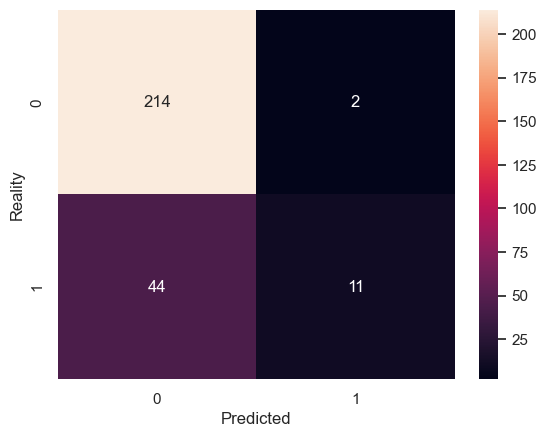

In [17]:
y_pred = np.array(Best_custom_model.predict(X_test))
knn_accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Reality')
plt.show()

## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [18]:
# Load test.csv
eval_df= pd.read_csv('test.csv')

X_eval_test = scaler.transform(eval_df)
y_pred_eval = Best_custom_model.predict(X_eval_test)

Save the results in a DataFrame

In [19]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [20]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)
rf_cv.fit(X_train, y_train)
best_rf = rf_cv.best_estimator_
y_pred_rf = best_rf.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_rf)

print(f'accuracy of random forest model: {random_forest_accuracy}')
print('Classification Report:')
print("-" * 53)
print(classification_report(y_test, y_pred_rf))
print("-" * 53)

accuracy of random forest model: 0.8339483394833949
Classification Report:
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       216
           1       0.78      0.25      0.38        55

    accuracy                           0.83       271
   macro avg       0.81      0.62      0.64       271
weighted avg       0.83      0.83      0.80       271

-----------------------------------------------------


Visualize the confusion matrix for Random Forest predictions

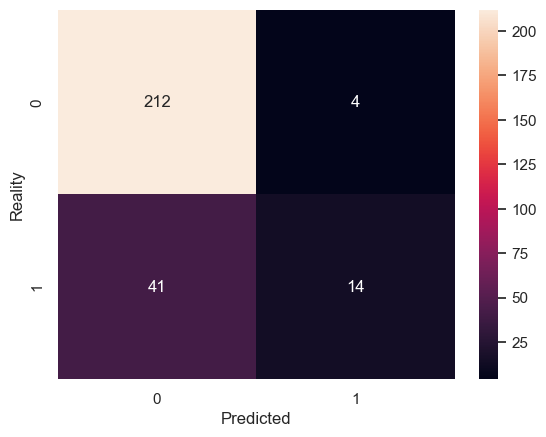

In [21]:
confusion_mat = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Reality')
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

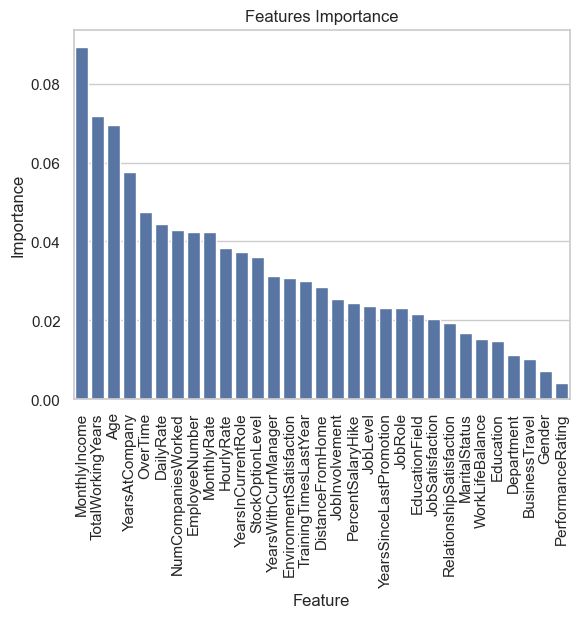

In [22]:
# Get the feature importances from the trained Random Forest model
importances= best_rf.feature_importances_

indices = np.argsort(importances)[::-1]
features = X.columns[indices]
importances = importances[indices]
fig, ax = plt.subplots()
sns.barplot(x=features, y=importances, ax=ax)
ax.set_title('Features Importance')
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')

plt.tick_params(axis='x', rotation=90)
plt.show()

# Bagging with KNN (12 points)

In [23]:
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

bagging_knn.fit(X_train, y_train)

y_pred_bg = bagging_knn.predict(X_test)
bg_accuracy = accuracy_score(y_test, y_pred_bg)

print(f'accuracy of bagging KKN model: {bg_accuracy}')
print('Classification Report:')
print("-" * 53)
print(classification_report(y_test, y_pred_bg))
print("-" * 53)

accuracy of bagging KKN model: 0.8265682656826568
Classification Report:
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       216
           1       0.90      0.16      0.28        55

    accuracy                           0.83       271
   macro avg       0.86      0.58      0.59       271
weighted avg       0.84      0.83      0.77       271

-----------------------------------------------------


Visualize the confusion matrix for Baggin KNN predictions

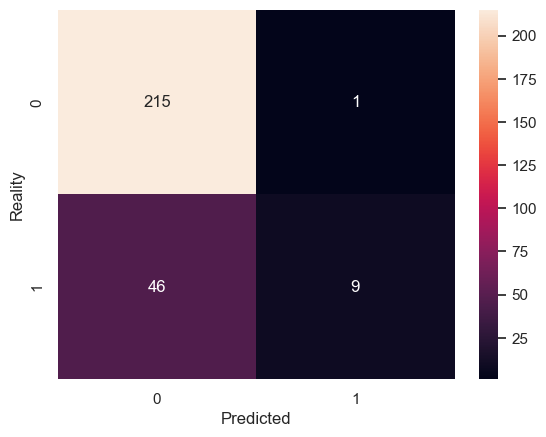

In [24]:
confusion_mat = confusion_matrix(y_test, y_pred_bg)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Reality')
plt.show()

# AdaBoost Model (12 points)

In [25]:
adaboost = AdaBoostClassifier(random_state=42)
param_grid_ada = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)
adaboost_cv.fit(X_train, y_train)
best_ada = adaboost_cv.best_estimator_
y_pred_ada = best_ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)

print(f'accuracy of AdaBoost model: {ada_accuracy}')
print('Classification Report:')
print("-" * 53)
print(classification_report(y_test, y_pred_ada))
print("-" * 53)

D:\university\term 5\ML\Homeworks\HW2\HW2\Practical1\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\university\term 5\ML\Homeworks\HW2\HW2\Practical1\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\university\term 5\ML\Homeworks\HW2\HW2\Practical1\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\university\term 5\ML\Homeworks\HW2\HW2\Practical1\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the 

accuracy of AdaBoost model: 0.8339483394833949
Classification Report:
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.99      0.90       216
           1       0.81      0.24      0.37        55

    accuracy                           0.83       271
   macro avg       0.82      0.61      0.64       271
weighted avg       0.83      0.83      0.80       271

-----------------------------------------------------


D:\university\term 5\ML\Homeworks\HW2\HW2\Practical1\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Visualize the confusion matrix for AdaBoost predictions

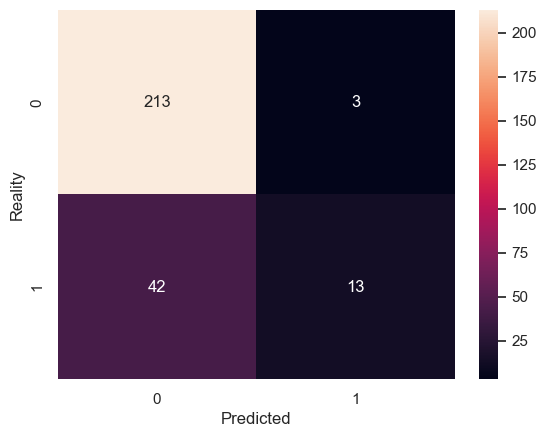

In [26]:
# TODO: Create a confusion matrix for AdaBoost predictions
# Use confusion_matrix from sklearn.metrics
confusion_mat = confusion_matrix(y_test, y_pred_ada)

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Reality')
plt.show()

# Model Comparison (4 points)

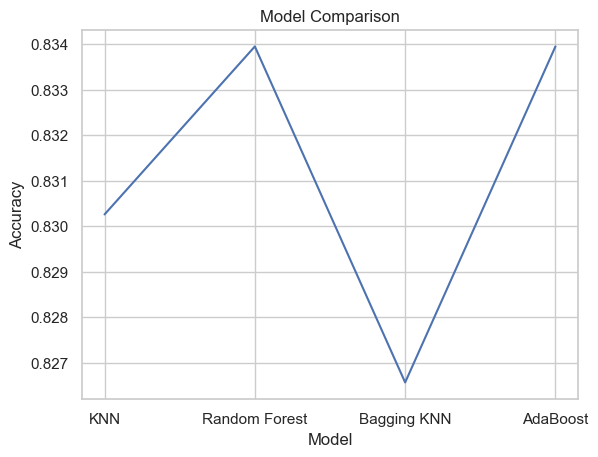

In [27]:
model_names = ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost']
accuracies = [knn_accuracy, random_forest_accuracy, bg_accuracy, ada_accuracy]

models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

fig, ax = plt.subplots()
sns.lineplot(data=models, x='Model', y='Accuracy', ax=ax)
ax.set_title('Model Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()